In [24]:
%%time 
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics
from sklearn.metrics import classification_report

df = pd.read_excel(fr"C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\funkcni\funcni data set - Copy.xlsx")
df = df.drop(df.index[:13])
df = df.drop(df.index[-1:])

df_train =df.drop(df.index[-12:])
df_test = df.drop(df.index[:-12])
df_test_graf = df_test

#@ parametry
#TODO kouknotut se na vzorec zbytku jestli nahodou neznam i zbytek ne jenom zbytek-1

#>> dataframy
X = df[parametry]
y = df['aktivni']
X_train = df_train[parametry]
y_train =  df_train["aktivni"]
X_test = df_test[parametry]
y_test = df_test['aktivni']
#>>PCA
#TODO zkusit implementovat PCA dokumentace na sk learn: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
#//parametry = ['aktivni-1', 'nove-1','zbytek-1']
#//pca = PCA(n_components=2)
#//pca.fit(df[parametry])
#//keep = pca.get_feature_names_out(df[parametry])
#//print(keep)
#//pca_X = pca.fit_transform(X)
#//display(X)
#//display(pca_X)
#>> trenink
n_estimators = 15
gbr = GradientBoostingRegressor(n_estimators=n_estimators, loss='absolute_error')
gbr.fit(X_train, y_train)

#>> evaluace
y_pred = gbr.predict(X_test)

#>> dotrenovani modelu na vsech datech
gbr.fit(X,y)

#>> graf
plt.figure()
plt.scatter(X_test.index, y_test,c="orange")
plt.plot(X_test.index, y_test,c="orange", label="realita")
plt.scatter(X_test.index, y_pred, color="cornflowerblue")
plt.plot(X_test.index, y_pred, color="cornflowerblue", label=f"predikce_n_estimators={n_estimators}", linewidth=2)
plt.title("Gradient Boosting Regression")
plt.legend()
plt.ylim(0,10000)
plt.show()

#>>metriky.
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = np.sqrt(metrics.r2_score(y_test, y_pred))
print("R2:", r2)
print("Root Mean Squared Error:", rmse)

ValueError: input_features is not equal to feature_names_in_

    aktivni-1  nove-1  zbytek-1
97     7714.0  1674.0    5872.0


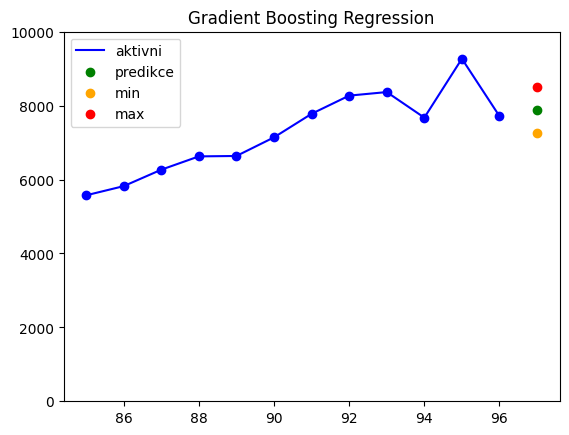


Model:      GradientBoostingRegressor(n_estimators=16)
Min:        7264
Predikce:   7887
Max:        8510
Rmse:       623



In [2]:
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_excel(fr"C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\funkcni\funcni data set - Copy.xlsx")
df_orig = df.drop(df.index[-12:])

df_new = df.drop(df.index[:-1])
print(df_new[parametry])
df_train = df.drop(df.index[-12:])

x_new = df_new[parametry]
#>> predikce
y_new_pred = gbr.predict(x_new)
#>> graf
plt.figure()
plt.title("Gradient Boosting Regression")
#* realita
plt.plot(X_test.index, df_test['aktivni'],label="aktivni",color="blue")
plt.scatter(X_test.index, df_test['aktivni'],color="blue")
#* predikce
plt.scatter(x_new.index, y_new_pred, label='predikce', color="green")
plt.scatter(x_new.index, y_new_pred - rmse, label="min", color="orange")
plt.scatter(x_new.index, y_new_pred + rmse, label="max", color="red")
plt.legend()
plt.ylim(0,10000)
plt.show()
#>> print
print(f"""
Model:      {gbr}
Min:        {int(y_new_pred-rmse)}
Predikce:   {int(y_new_pred)}
Max:        {int(y_new_pred+rmse)}
Rmse:       {int(rmse)}
""")